In [1]:
'''
tp = TextProcessor
# is, ASAP !!!!
df = tp.apply_contractions(df, col)
# is, AS SOON AS POSSIBLE !!!!
df = tp.remove_nonAlphanumeric(df, col)
# is  AS SOON AS POSSIBLE
df = tp.to_lower(df, col)
# is  as soon as possible
df = tp.apply_lemmatization(df, col)
# be  as soon as possible
df = tp.remove_stopwords(df, col)
#        soon    possible
df = tp.remove_extra_spaces(df, col)
# soon possible
# '''

# features + tfidf(ngram=(1,1)) + rating + tense + length + sentiment*2

'\ntp = TextProcessor\n# is, ASAP !!!!\ndf = tp.apply_contractions(df, col)\n# is, AS SOON AS POSSIBLE !!!!\ndf = tp.remove_nonAlphanumeric(df, col)\n# is  AS SOON AS POSSIBLE\ndf = tp.to_lower(df, col)\n# is  as soon as possible\ndf = tp.apply_lemmatization(df, col)\n# be  as soon as possible\ndf = tp.remove_stopwords(df, col)\n#        soon    possible\ndf = tp.remove_extra_spaces(df, col)\n# soon possible\n# '

In [2]:
from utils import DataLoader, Metrics 
from classifiers import RandomForest, DecisionTree, LSVM, AdaBoost, XGBoost

In [3]:
data = DataLoader()
X_train, X_test, y_train, y_test = data.datasets

In [4]:
X_test.shape

(193, 269)

========================= DecisionTree =========================
Elapsed Time: 28.7067 seconds
DecisionTreeClassifier(criterion='entropy', max_depth=12, min_samples_leaf=10,
                       min_samples_split=32)
Train Accuracy: 0.6667, F1: [0.6643 0.6008 0.6775 0.7163]
Test  Accuracy: 0.5337, F1: [0.5872 0.4    0.5843 0.5591]


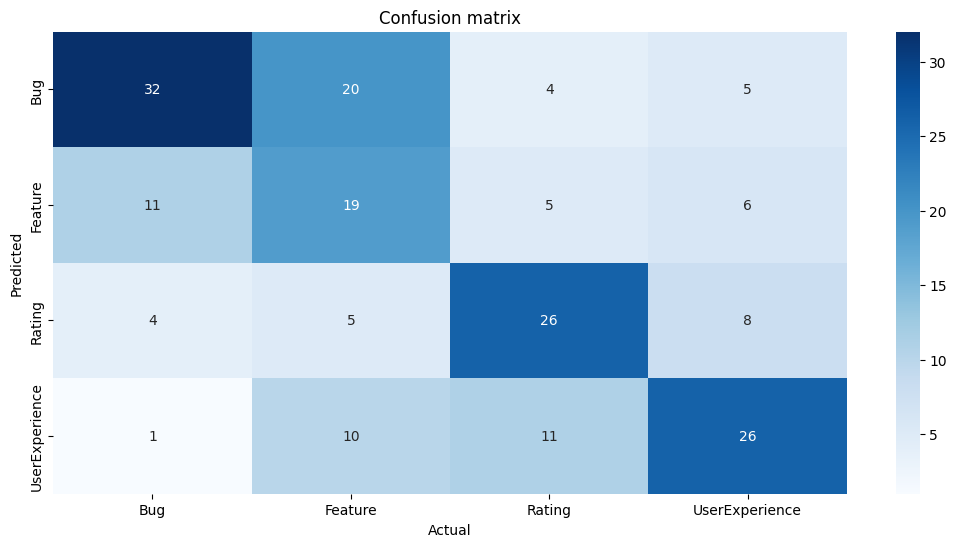

========================= LSVM =========================
Elapsed Time: 28.7426 seconds
LinearSVC(C=0.1, dual=False)
Train Accuracy: 0.7564, F1: [0.7796 0.6302 0.7617 0.8065]
Test  Accuracy: 0.6269, F1: [0.7656 0.4375 0.5474 0.6465]


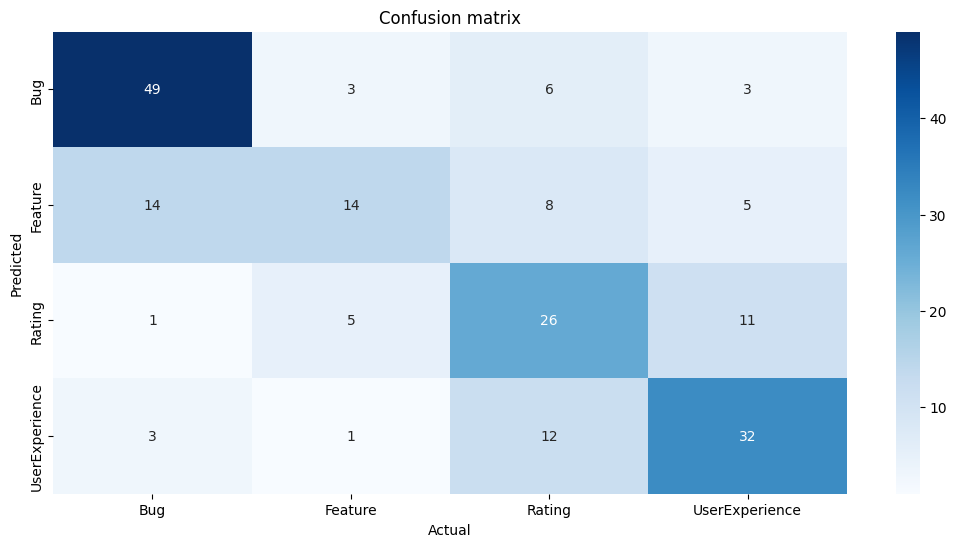

========================= RandomForest =========================
Elapsed Time: 47.0498 seconds
RandomForestClassifier(max_depth=47, min_samples_split=3, n_estimators=1000)
Train Accuracy: 0.9963, F1: [0.9949 1.     0.9948 0.9964]
Test  Accuracy: 0.6269, F1: [0.7218 0.4928 0.5412 0.6667]


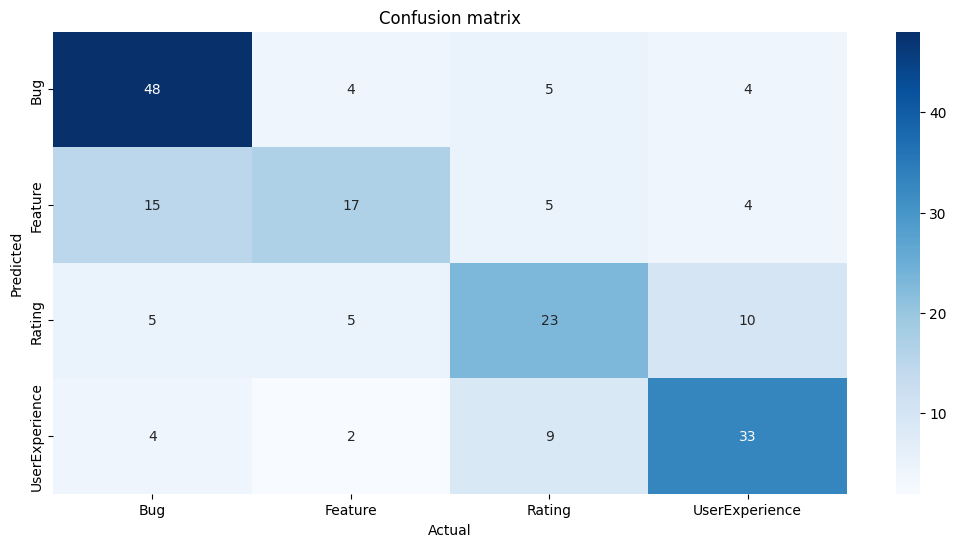

========================= AdaBoost =========================
Elapsed Time: 5.5287 seconds
AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=LinearSVC(C=100, dual=False),
                   learning_rate=0.01)
Train Accuracy: 0.7756, F1: [0.7778 0.665  0.795  0.8298]
Test  Accuracy: 0.6166, F1: [0.7581 0.4412 0.5361 0.6392]


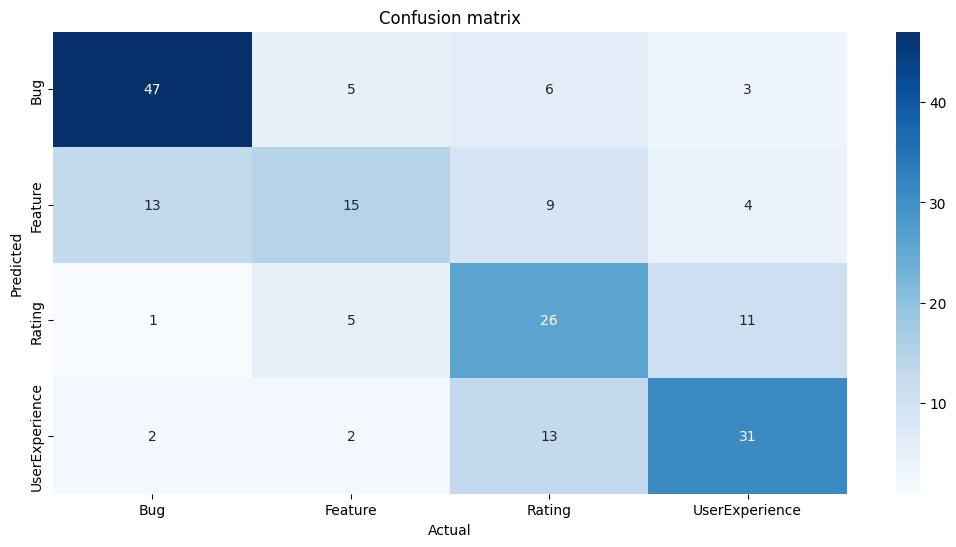

========================= XGBoost =========================
Elapsed Time: 75.6974 seconds
XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1,
              colsample_bytree=0.7223077859076013, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None,
              gamma=0.48692533075149097, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.050615417410842384, max_bin=256,
              max_cat_to_onehot=4, max_delta_step=0, max_depth=4, max_leaves=0,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=133, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', predictor='auto', random_state=0,
              reg_alpha=0, ...)
Train Accuracy: 0.8132, F1: [0.8395 0.8148 0.7786 0.817 ]
Test  Accuracy: 0.6321, F1: [0.7143 0.507  0.5581 0.6796]


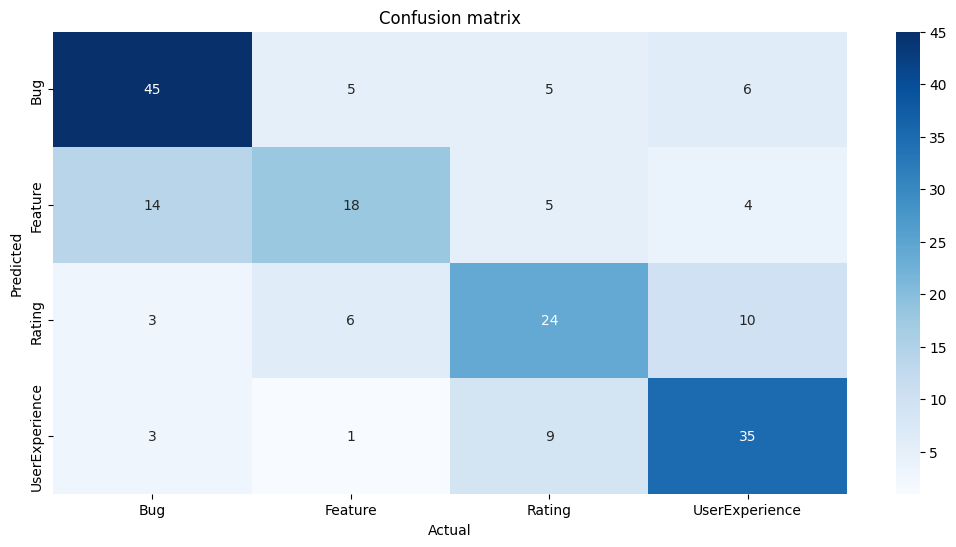

In [5]:
clfs = [DecisionTree, LSVM, RandomForest, AdaBoost, XGBoost]

for clf in clfs:
    print(f"========================= {clf.__name__} =========================")
    model = clf()
    model.model_selection(X_train, y_train)
    print(model.clf)

    Metrics.report(model, X_train, X_test, y_train, y_test)
    pred = model.predict(X_test)
    Metrics.plot_confusion_matrix(y_test, pred, data.labels)